In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np
import pandas as pd

## Load Data

In [3]:
# read in contracts
df = pd.read_csv('contracts.csv')
df.head()

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager
0,"Klingberg, John",Anaheim Ducks,"Jul. 29, 2022",Standard (UFA),1 year,"$7,000,000","$7,000,000",/players/john-klingberg,/teams/ducks,PAT VERBEEK
1,"Terry, Troy",Anaheim Ducks,"Aug. 2, 2023",Standard (RFA),7 years,"$7,000,000","$49,000,000",/players/troy-terry,/teams/ducks,PAT VERBEEK
2,"Killorn, Alex",Anaheim Ducks,"Jul. 1, 2023",Standard (UFA),4 years,"$6,250,000","$25,000,000",/players/alex-killorn,/teams/ducks,PAT VERBEEK
3,"Zegras, Trevor",Anaheim Ducks,"Oct. 2, 2023",Standard (RFA),3 years,"$5,750,000","$17,250,000",/players/trevor-zegras,/teams/ducks,PAT VERBEEK
4,"Strome, Ryan",Anaheim Ducks,"Jul. 13, 2022",Standard (UFA),5 years,"$5,000,000","$25,000,000",/players/ryan-strome,/teams/ducks,PAT VERBEEK


In [4]:
# read in cap history
df_cap = pd.read_csv('capHistory.csv')
df_cap

,season,dateConfirmed,percentChange,upperLimit,lowerLimit,minSalary
0,2025-26,NHL Estimate,5.14%,"$92,000,000","$68,000,000","$775,000"
1,2024-25,NHL Estimate,4.79%,"$87,500,000","$64,700,000","$775,000"
2,2023-24,"Jun. 23, 2023",1.21%,"$83,500,000","$61,700,000","$775,000"
3,2022-23,"Mar. 29, 2022",1.23%,"$82,500,000","$61,000,000","$750,000"
4,2021-22,"Jul. 1, 2021",0.00%,"$81,500,000","$60,200,000","$750,000"
5,2020-21,"Jul. 10, 2020",0.00%,"$81,500,000","$60,200,000","$700,000"
6,2019-20,"Jun. 22, 2019",2.52%,"$81,500,000","$60,200,000","$700,000"
7,2018-19,"Jun. 21, 2018",6.00%,"$79,500,000","$58,800,000","$650,000"
8,2017-18,"Jun. 18, 2017",2.74%,"$75,000,000","$55,400,000","$650,000"
9,2016-17,"Jun. 21, 2016",2.24%,"$73,000,000","$54,000,000","$575,000"


## Clean Data

In [5]:
# remove unconfirmed cap history
df_cap = df_cap[df_cap['dateConfirmed'] != 'NHL Estimate'].copy()

# convert dateConfirmed to datetime object
df_cap['dateConfirmed'] = pd.to_datetime(df_cap['dateConfirmed'])

# convert percent string to numeric
df_cap['percentChange'] = df_cap['percentChange'].str.rstrip('%').astype(float) / 100

# convert money string to numeric
df_cap['upperLimit'] = df_cap['upperLimit'].replace( '[\$,)]','', regex=True).astype(float)
df_cap['lowerLimit'] = df_cap['lowerLimit'].replace( '[\$,)]','', regex=True).astype(float)
df_cap['minSalary'] = df_cap['minSalary'].replace( '[\$,)]','', regex=True).astype(float)

# add seasonId var
df_cap['seasonId'] = df_cap['season'].str[0:4].astype(int)

In [6]:
df_cap

,season,dateConfirmed,percentChange,upperLimit,lowerLimit,minSalary,seasonId
2,2023-24,2023-06-23,0.0121,83500000.0,61700000.0,775000.0,2023
3,2022-23,2022-03-29,0.0123,82500000.0,61000000.0,750000.0,2022
4,2021-22,2021-07-01,0.0000,81500000.0,60200000.0,750000.0,2021
5,2020-21,2020-07-10,0.0000,81500000.0,60200000.0,700000.0,2020
6,2019-20,2019-06-22,0.0252,81500000.0,60200000.0,700000.0,2019
7,2018-19,2018-06-21,0.0600,79500000.0,58800000.0,650000.0,2018
8,2017-18,2017-06-18,0.0274,75000000.0,55400000.0,650000.0,2017
9,2016-17,2016-06-21,0.0224,73000000.0,54000000.0,575000.0,2016
10,2015-16,2015-06-23,0.0348,71400000.0,52800000.0,575000.0,2015
11,2014-15,2014-06-27,0.0731,69000000.0,51000000.0,525000.0,2014


Contracts dataframe

In [7]:
df.head()

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager
0,"Klingberg, John",Anaheim Ducks,"Jul. 29, 2022",Standard (UFA),1 year,"$7,000,000","$7,000,000",/players/john-klingberg,/teams/ducks,PAT VERBEEK
1,"Terry, Troy",Anaheim Ducks,"Aug. 2, 2023",Standard (RFA),7 years,"$7,000,000","$49,000,000",/players/troy-terry,/teams/ducks,PAT VERBEEK
2,"Killorn, Alex",Anaheim Ducks,"Jul. 1, 2023",Standard (UFA),4 years,"$6,250,000","$25,000,000",/players/alex-killorn,/teams/ducks,PAT VERBEEK
3,"Zegras, Trevor",Anaheim Ducks,"Oct. 2, 2023",Standard (RFA),3 years,"$5,750,000","$17,250,000",/players/trevor-zegras,/teams/ducks,PAT VERBEEK
4,"Strome, Ryan",Anaheim Ducks,"Jul. 13, 2022",Standard (UFA),5 years,"$5,000,000","$25,000,000",/players/ryan-strome,/teams/ducks,PAT VERBEEK


In [8]:
# convert sign date to datetime format
dates = df['signDate']
clean_dates = []
for date in dates:
    if date[3] != '.':
        date = date[:3] + '.' + date[3:]
    clean_dates.append(date)
df['signDate'] = pd.to_datetime(clean_dates)

# convert term from str to int
df['term'] = df['term'].str[0:2].astype(int)

# convert currency to float
df['aav'] = df['aav'].replace( '[\$,)]','', regex=True).astype(float)
df['totalValue'] = df['totalValue'].replace( '[\$,)]','', regex=True).astype(float)

# calculate sign season
df['signSeason'] = np.where(df['signDate'].dt.month < 3, df['signDate'].dt.year - 1, df['signDate'].dt.year)

In [9]:
df.head()

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager,signSeason
0,"Klingberg, John",Anaheim Ducks,2022-07-29,Standard (UFA),1,7000000.0,7000000.0,/players/john-klingberg,/teams/ducks,PAT VERBEEK,2022
1,"Terry, Troy",Anaheim Ducks,2023-08-02,Standard (RFA),7,7000000.0,49000000.0,/players/troy-terry,/teams/ducks,PAT VERBEEK,2023
2,"Killorn, Alex",Anaheim Ducks,2023-07-01,Standard (UFA),4,6250000.0,25000000.0,/players/alex-killorn,/teams/ducks,PAT VERBEEK,2023
3,"Zegras, Trevor",Anaheim Ducks,2023-10-02,Standard (RFA),3,5750000.0,17250000.0,/players/trevor-zegras,/teams/ducks,PAT VERBEEK,2023
4,"Strome, Ryan",Anaheim Ducks,2022-07-13,Standard (UFA),5,5000000.0,25000000.0,/players/ryan-strome,/teams/ducks,PAT VERBEEK,2022


## EDA
Number of contracts signed per season in dataset.

<Axes: xlabel='signSeason'>

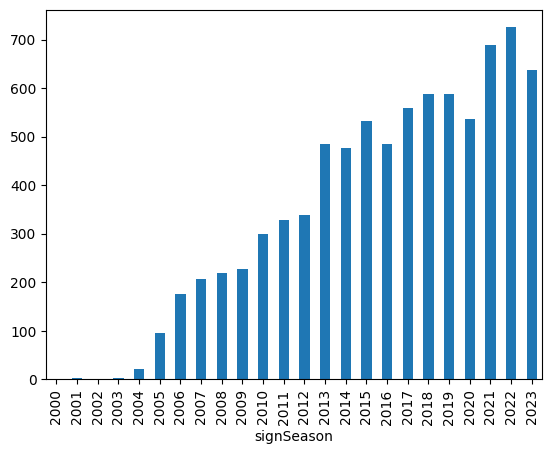

In [10]:
df['signSeason'].value_counts().sort_index().plot(kind='bar')

Comparing min and max contract from each season

In [67]:
df_nonEntry = df[~df['contractType'].str.contains('Entry-Level')]
df_nonEntry.head()

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager,signSeason
0,"Klingberg, John",Anaheim Ducks,2022-07-29,Standard (UFA),1,7000000.0,7000000.0,/players/john-klingberg,/teams/ducks,PAT VERBEEK,2022
1,"Terry, Troy",Anaheim Ducks,2023-08-02,Standard (RFA),7,7000000.0,49000000.0,/players/troy-terry,/teams/ducks,PAT VERBEEK,2023
2,"Killorn, Alex",Anaheim Ducks,2023-07-01,Standard (UFA),4,6250000.0,25000000.0,/players/alex-killorn,/teams/ducks,PAT VERBEEK,2023
3,"Zegras, Trevor",Anaheim Ducks,2023-10-02,Standard (RFA),3,5750000.0,17250000.0,/players/trevor-zegras,/teams/ducks,PAT VERBEEK,2023
4,"Strome, Ryan",Anaheim Ducks,2022-07-13,Standard (UFA),5,5000000.0,25000000.0,/players/ryan-strome,/teams/ducks,PAT VERBEEK,2022


In [103]:
highest_aav_by_season = []
for i in range(0, len(sign_seasons)):
    highest_aav_by_season.append(df_nonEntry[df_nonEntry['signSeason']==sign_seasons[i]]\
                                     .sort_values('aav', ascending=False)\
                                     .iloc[0])
pd.DataFrame(highest_aav_by_season)

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager,signSeason
317,"Lidström, Nicklas",Detroit Red Wings,2006-06-30,35+ (UFA),2,7600000.0,15200000.0,/players/nicklas-lidstrom,/teams/redwings,KEN HOLLAND,2006
2047,"Ovechkin, Alex",Washington Capitals,2008-01-10,Standard (RFA),13,9538462.0,124000000.0,/players/alex-ovechkin,/teams/capitals,GEORGE MCPHEE,2007
3020,"Malkin, Evgeni",Pittsburgh Penguins,2008-07-02,Standard (RFA),5,8700000.0,43500000.0,/players/evgeni-malkin,/teams/penguins,RAY SHERO,2008
5424,"Gáborík, Marián",New York Rangers,2009-07-01,Standard (UFA),5,7500000.0,37500000.0,/players/marian-gaborik,/teams/rangers,GLEN SATHER,2009
6375,"Thornton, Joe",San Jose Sharks,2010-10-16,Standard (UFA),3,7000000.0,21000000.0,/players/joe-thornton,/teams/sharks,DOUG WILSON,2010
7226,"Stamkos, Steven",Tampa Bay Lightning,2011-07-18,Standard (RFA),5,7500000.0,37500000.0,/players/steven-stamkos,/teams/lightning,STEVE YZERMAN,2011
3022,"Crosby, Sidney",Pittsburgh Penguins,2012-07-01,Standard (UFA),12,8700000.0,104400000.0,/players/sidney-crosby,/teams/penguins,RAY SHERO,2012
3019,"Malkin, Evgeni",Pittsburgh Penguins,2013-07-01,Standard (UFA),8,9500000.0,76000000.0,/players/evgeni-malkin,/teams/penguins,RAY SHERO,2013
705,"Subban, P.K.",Montreal Canadiens,2014-08-02,Standard (RFA),8,9000000.0,72000000.0,/players/pk-subban,/teams/canadiens,MARC BERGEVIN,2014
5726,"Kopitar, Anze",Los Angeles Kings,2016-01-16,Standard (UFA),8,10000000.0,80000000.0,/players/anze-kopitar,/teams/kings,DEAN LOMBARDI,2015


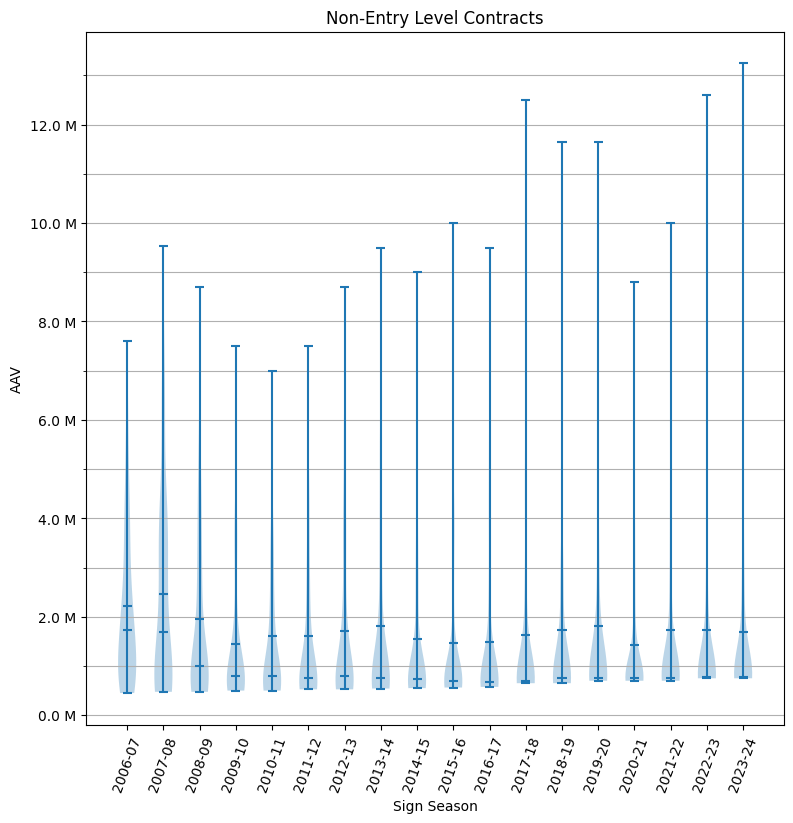

In [70]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

# generate some random test data
sign_seasons = sorted(df_nonEntry[df_nonEntry['signSeason']>=2006]['signSeason'].unique())
all_data = [df_nonEntry[df_nonEntry['signSeason']==year]['aav'] for year in sign_seasons]

# plot violin plot
ax.violinplot(all_data,
                  showmeans=True,
                  showmedians=True)
ax.set_title('Non-Entry Level Contracts')
ax.set_xlabel('Sign Season')
ax.set_ylabel('AAV')

# x axis
sign_seasons_labels = [str(season) + '-' + str(season+1)[2:] for season in sign_seasons]
ax.set_xticks([y + 1 for y in range(len(all_data))],
              labels=sign_seasons_labels)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=70)

# y axis
y_axis_space_between_ticks = 2000000
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_axis_space_between_ticks))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(y_axis_space_between_ticks/2))
ax.yaxis.set_major_formatter(million_formatter)
ax.yaxis.grid(True, which='both')

plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_perYear.index, df_perYear['count'])

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()